In [89]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
ticker = 'AAPL'
start = '2015-01-01'
end = '2023-08-01'

In [91]:
data = yf.download(ticker, start, end)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100


# Simple Moving Average Crossover Strategy. 

We'll use a short-term moving average (e.g., 50-day) and a long-term moving average (e.g., 200-day). 

When the short-term moving average crosses above the long-term moving average, it generates a buy signal. When it crosses below, it generates a sell signal.

In [92]:
data['SMA50'] = data["Close"].rolling(50).mean()
data['SMA200'] = data["Close"].rolling(200).mean()

data["Prev SMA50"] = data["SMA50"].shift(1)

data.dropna(inplace=True)

data

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,Prev SMA50
Date,,,,,,,,,
2015-10-16,27.945000,28.000000,27.632500,27.760000,25.231968,156930400,28.086900,30.332337,28.107350
2015-10-19,27.700001,27.937500,27.527500,27.932501,25.388762,119036800,28.067950,30.335337,28.086900
2015-10-20,27.834999,28.542500,27.705000,28.442499,25.852314,195871200,28.038200,30.344737,28.067950
2015-10-21,28.500000,28.895000,28.424999,28.440001,25.850046,167180800,28.039550,30.354112,28.038200
2015-10-22,28.582500,28.875000,28.525000,28.875000,26.245436,166616400,28.040850,30.363800,28.039550
...,...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200,183.967201,157.941850,183.569801
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900,184.405800,158.187200,183.967201
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200,184.828800,158.452850,184.405800


In [93]:
def find_crossovers(fast_sma, prev_fast_sma, slow_sma):
    if fast_sma > slow_sma and prev_fast_sma < slow_sma:
        return 'Bullish Crossover'
    elif fast_sma < slow_sma and prev_fast_sma > slow_sma:
        return 'Bearish Crossover'
    return None

data["crossover"] = np.vectorize(find_crossovers)(data["SMA50"], data["Prev SMA50"], data["SMA200"])

signal = data[data["crossover"] == 'Bullish Crossover'].copy()

data

,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA200,Prev SMA50,crossover
Date,,,,,,,,,,
2015-10-16,27.945000,28.000000,27.632500,27.760000,25.231968,156930400,28.086900,30.332337,28.107350,None
2015-10-19,27.700001,27.937500,27.527500,27.932501,25.388762,119036800,28.067950,30.335337,28.086900,None
2015-10-20,27.834999,28.542500,27.705000,28.442499,25.852314,195871200,28.038200,30.344737,28.067950,None
2015-10-21,28.500000,28.895000,28.424999,28.440001,25.850046,167180800,28.039550,30.354112,28.038200,None
2015-10-22,28.582500,28.875000,28.525000,28.875000,26.245436,166616400,28.040850,30.363800,28.039550,None
...,...,...,...,...,...,...,...,...,...,...
2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200,183.967201,157.941850,183.569801,None
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900,184.405800,158.187200,183.967201,None
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200,184.828800,158.452850,184.405800,None


In [94]:
class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        
    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'
        
    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'status': self.status,
        }
        
        
class Strategy:
    def __init__(self, df, starting_balance, volume):
        self.starting_balance = starting_balance
        self.volume = volume
        self.positions = []
        self.data = df
        
    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df
        
    def add_position(self, position):
        self.positions.append(position)
        
        return True
        
# This is the main strategy logic.
    def run(self):
        for i, data in self.data.iterrows():
            if data.crossover == 'Bearish Crossover':
                for position in self.positions:
                    if position.status == 'open':
                        position.close_position(data.name, data.Close)
            
            if data.crossover == 'Bullish Crossover':
                self.add_position(Position(data.name, data.Close, 'buy', self.volume, 0, 0))
        
        return self.get_positions_df()

In [95]:
sma_crossover_strategy = Strategy(data, 10000, 1)
result = sma_crossover_strategy.run()

result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,2016-09-02,26.932501,buy,1,0,0,2018-12-20,39.207500,12.275000,closed,10012.275000
1,2019-05-07,50.715000,buy,1,0,0,2022-06-03,145.380005,94.665005,closed,10106.940004
2,2023-03-23,158.929993,buy,1,0,0,NaT,NaN,NaN,open,NaN


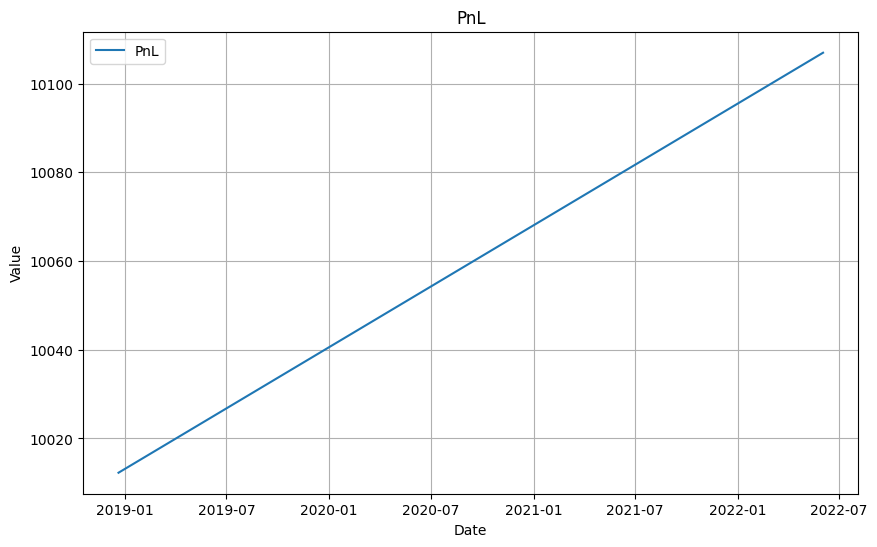

In [96]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(result["close_datetime"], result["pnl"], label="PnL")
ax1.set_xlabel("Date")
ax1.set_ylabel("Value")
ax1.legend()

plt.title("PnL")
plt.grid(True)
plt.show()

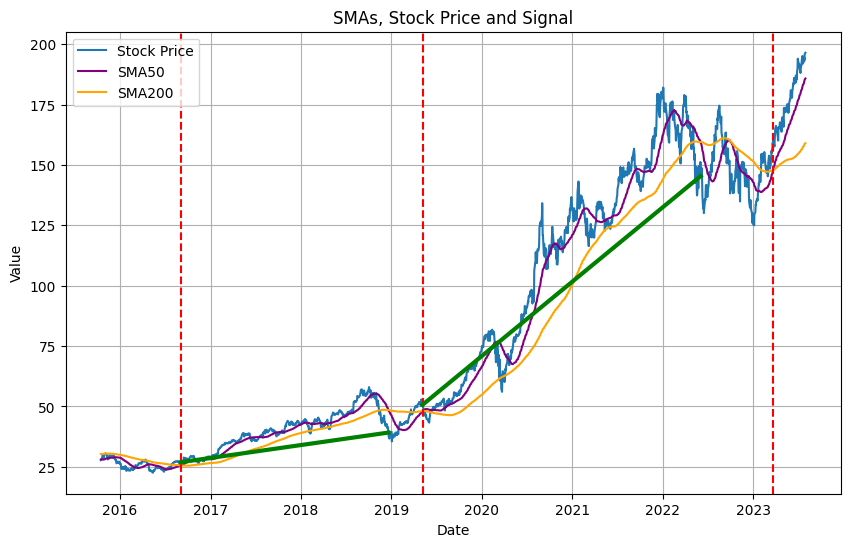

In [97]:
# Plotting the SMAs and stock price
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stock price and SMAs
ax1.plot(data.index, data["Close"], label="Stock Price")
ax1.plot(data.index, data["SMA50"], label="SMA50", color="purple")
ax1.plot(data.index, data["SMA200"], label="SMA200", color="orange")
ax1.set_xlabel("Date")
ax1.set_ylabel("Value")
ax1.legend()

# Plot vertical lines for bullish signals
for signal_date in signal.index:
    ax1.axvline(x=signal_date, color='red', linestyle='--', label="Bullish Crossover")

for i, row in result[result['status'] == 'closed'].iterrows():
    if row.profit > 0:
        ax1.plot([row.open_datetime, row.close_datetime], [row.open_price, row.close_price], color="Green", linewidth=3)
    elif row.profit < 0:
        ax1.plot([row.open_datetime, row.close_datetime], [row.open_price, row.close_price], color="Red", linewidth=3)

plt.title("SMAs, Stock Price and Signal")
plt.grid(True)
plt.show()